<a href="https://colab.research.google.com/github/adityabissa/6thSem-ML-Lab/blob/main/1BM22CS016_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

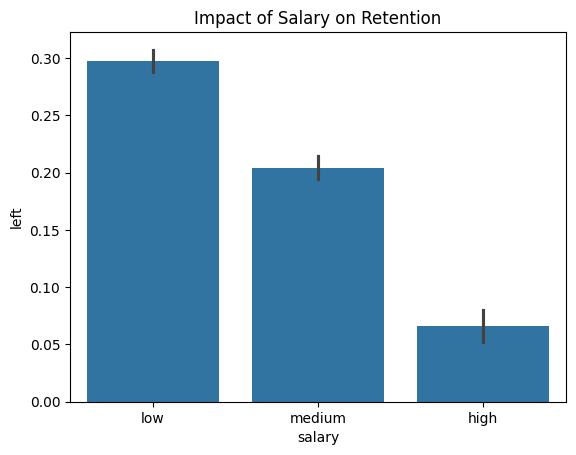

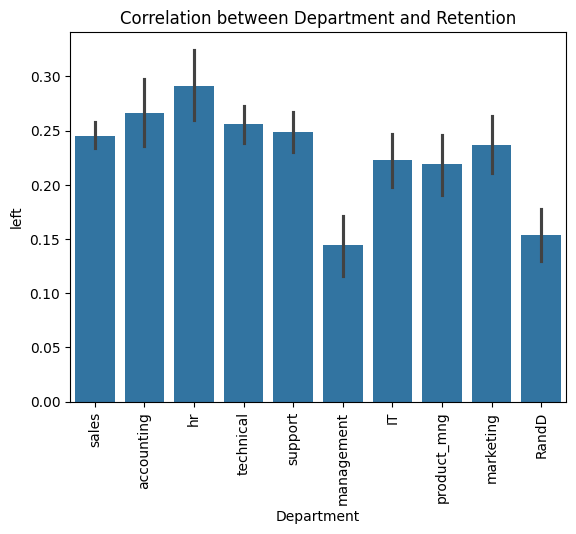

Accuracy of the model: 0.7623333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('HR_comma_sep.csv')

# 1. Exploratory Data Analysis
# Explore relationships between variables and employee retention ('left')

# Visualizations (bar charts)
# Impact of salary on retention:
sns.barplot(x='salary', y='left', data=data)
plt.title('Impact of Salary on Retention')
plt.show()

# Correlation between department and retention:
sns.barplot(x='Department', y='left', data=data)
plt.xticks(rotation=90)
plt.title('Correlation between Department and Retention')
plt.show()

# You can explore other variables similarly

# Based on EDA, assume we identify 'satisfaction_level', 'last_evaluation',
# 'number_project', 'average_montly_hours', 'time_spend_company', and 'salary'
# as significant factors.

# 2. Build Logistic Regression Model
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
          'average_montly_hours', 'time_spend_company', 'salary']]
y = data['left']

# Convert 'salary' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['salary'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Measure Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 95.24%


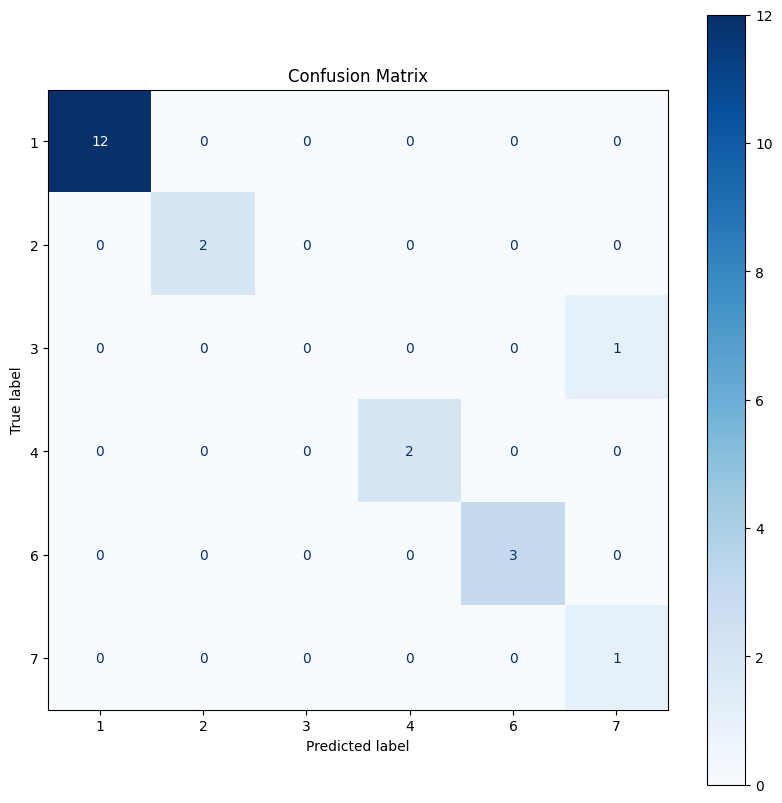

In [4]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the datasets
zoo_data = pd.read_csv('zoo-data.csv')
zoo_class_type = pd.read_csv('zoo-class-type.csv')

# Preprocessing: Remove animal names column
zoo_data_clean = zoo_data.drop('animal_name', axis=1)

# Splitting data into features and target
X = zoo_data_clean.drop('class_type', axis=1)
y = zoo_data_clean['class_type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with corrected labels
unique_labels = sorted(list(set(y_test) | set(y_pred)))

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()